# Profit analysis

Let's recap the objective of the problem (see the files in the references folder):

> The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. 

> The objective of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base.  Hopefully, the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.



We have already built a model that predicts the probability of a customer buying the gadget. Also, we have already segmented our customers. Now, we will use this model to predict the profit of the campaign, aiming to maximize it.

The profit of the campaign is given by the formula:

$$
\text{Profit} = \text{Number of customers} \times \text{Probability of buying} \times \text{Revenue} - \text{Number of customers} \times \text{Cost}
$$

Where:

- Number of customers: the number of customers that we target in the campaign
- Probability of buying: the probability of a customer buying the gadget
- Revenue: the revenue that we get from selling the gadget
- Cost: the cost of the campaign
- Profit: the profit of the campaign

From the problem description, and also from the first notebook (`Z_Revenue` and `Z_CostContact` columns of the original dataset), we know that:

- The revenue from selling the gadget is 11
- The cost of the campaign is 3

Let's import the necessary libraries, load the data and load the model:

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

import joblib

from marketing_case.config import BEST_MODEL_FILE, PROCESSED_DATA_FILE_RFM

In [2]:
df = pd.read_parquet(PROCESSED_DATA_FILE_RFM, engine="fastparquet")
df.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,Complain,Response,MonthsSinceEnrolled,AgeGroup,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,Segment
0,Graduation,Single,58138.0,635,88,546,172,88,88,8,...,0,1,22,46-60,1529,0,0,0,0,Elite
1,Graduation,Single,46344.0,11,1,6,2,1,6,1,...,0,0,3,46-60,21,2,1,0,0,Occasional
2,Graduation,Partner,71613.0,426,49,127,111,21,42,8,...,0,0,10,46-60,734,0,0,0,0,Valuable
3,Graduation,Partner,26646.0,11,4,20,10,3,5,2,...,0,0,4,18-30,48,1,1,0,0,Occasional
4,PhD,Partner,58293.0,173,43,118,46,27,15,5,...,0,0,5,31-45,407,1,1,0,0,Occasional


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   category
 1   Marital_Status       2205 non-null   category
 2   Income               2205 non-null   float64 
 3   MntWines             2205 non-null   int16   
 4   MntFruits            2205 non-null   int16   
 5   MntMeatProducts      2205 non-null   int16   
 6   MntFishProducts      2205 non-null   int16   
 7   MntSweetProducts     2205 non-null   int16   
 8   MntGoldProds         2205 non-null   int16   
 9   NumWebPurchases      2205 non-null   int8    
 10  NumCatalogPurchases  2205 non-null   int8    
 11  NumStorePurchases    2205 non-null   int8    
 12  Complain             2205 non-null   category
 13  Response             2205 non-null   category
 14  MonthsSinceEnrolled  2205 non-null   int8    
 15  AgeGroup             

In [4]:
# load model from disk
best_model = joblib.load(BEST_MODEL_FILE)

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encoding',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Marital_Status', 'Complain',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'Segment']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(),
                                                  ['Education', 'AgeGroup',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard_scaling',
                                                  StandardScaler(),
                                                  ['Income',
                                                   'MonthsSinceEnrolled']),
                                                 ('power_transformer',
                                                  PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'MntRegularProds'])])),
                ('clf',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.1,
                                    max_iter=2500, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

We can use our model to predict the probability of each customer buying the gadget. We will create a new dataframe with an additional column with the probability of buying the gadget:

In [5]:
df_proba = df.copy()

y_pred_proba = best_model.predict_proba(df_proba.drop(columns=["Response"]))[:, 1]

df_proba["Response_Proba"] = y_pred_proba

df_proba.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,Response,MonthsSinceEnrolled,AgeGroup,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,Segment,Response_Proba
0,Graduation,Single,58138.0,635,88,546,172,88,88,8,...,1,22,46-60,1529,0,0,0,0,Elite,0.973014
1,Graduation,Single,46344.0,11,1,6,2,1,6,1,...,0,3,46-60,21,2,1,0,0,Occasional,0.188370
2,Graduation,Partner,71613.0,426,49,127,111,21,42,8,...,0,10,46-60,734,0,0,0,0,Valuable,0.037615
3,Graduation,Partner,26646.0,11,4,20,10,3,5,2,...,0,4,18-30,48,1,1,0,0,Occasional,0.024662
4,PhD,Partner,58293.0,173,43,118,46,27,15,5,...,0,5,31-45,407,1,1,0,0,Occasional,0.022987


Now, we will search for a threshold that maximizes the profit of the campaign. We will try different thresholds and calculate the profit for each one. We will choose the threshold that gives us the highest profit.

What is the threshold? The threshold is the probability above which we will consider a customer as a buyer. For example, if the threshold is 0.5, we will consider that a customer is a buyer if the probability of buying is greater than 0.5. If the threshold is 0.7, we will consider that a customer is a buyer if the probability of buying is greater than 0.7.

Why do we need to choose a threshold? Because the model gives us the probability of a customer buying the gadget, not a binary answer. We need to choose a threshold to convert the probability into a binary answer (buyer or not buyer).

If our threshold is too low, we will consider many customers as buyers, but many of them will not buy the gadget. Our cost will be high (many customers targeted), but our revenue will be low (few customers buying the gadget).

If our threshold is too high, we will consider few customers as buyers (low cost), and even considering that all of them will buy the gadget, our revenue will also be low (few customers buying the gadget).

We need to find a balance between these two situations.

In [6]:
thresholds = np.arange(0.01, 1, 0.01)

thresholds

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

For each threshold, we are going to calculate:

- the number of customers that we target in the campaign
- the expected conversion (probability of buying, we will consider as the sum of the probabilities of the customers that we target)
- the conversion rate (expected conversion divided by the number of customers that we target)
- the expected revenue (expected conversion times the revenue)
- the expected cost (number of customers that we target times the cost)
- the profit (expected revenue minus expected cost)

In [7]:
revenue = 11
cost = 3

response_analysis_results = []

for threshold in thresholds:
    selected_customers = df_proba[df_proba["Response_Proba"] >= threshold]
    n_selected_customers = selected_customers.shape[0]
    proportion_selected_customers = n_selected_customers / df_proba.shape[0]
    expected_conversion = selected_customers["Response_Proba"].sum()
    conversion_rate = expected_conversion / n_selected_customers

    expected_revenue = expected_conversion * revenue
    expected_cost = n_selected_customers * cost
    expected_profit = expected_revenue - expected_cost

    response_analysis_results.append(
        {
            "threshold": threshold,
            "n_selected_customers": n_selected_customers,
            "proportion_selected_customers": proportion_selected_customers,
            "expected_conversion": expected_conversion,
            "conversion_rate": conversion_rate,
            "expected_revenue": expected_revenue,
            "expected_cost": expected_cost,
            "expected_profit": expected_profit,
        }
    )

df_response_analysis = pd.DataFrame(response_analysis_results)

df_response_analysis

,threshold,n_selected_customers,proportion_selected_customers,expected_conversion,conversion_rate,expected_revenue,expected_cost,expected_profit
0,0.01,2083,0.944671,712.409599,0.342011,7836.505592,6249,1587.505592
1,0.02,1964,0.890703,710.676676,0.361852,7817.443432,5892,1925.443432
2,0.03,1863,0.844898,708.205316,0.380142,7790.258479,5589,2201.258479
3,0.04,1789,0.811338,705.615080,0.394419,7761.765884,5367,2394.765884
4,0.05,1720,0.780045,702.496736,0.408428,7727.464100,5160,2567.464100
...,...,...,...,...,...,...,...,...
94,0.95,97,0.043991,94.967005,0.979041,1044.637058,291,753.637058
95,0.96,81,0.036735,79.676845,0.983665,876.445292,243,633.445292
96,0.97,68,0.030839,67.137328,0.987314,738.510607,204,534.510607
97,0.98,49,0.022222,48.602056,0.991879,534.622619,147,387.622619


We can easily identify the threshold that maximizes the profit:

In [8]:
higher_profit = df_response_analysis["expected_profit"].idxmax()

with pd.option_context("display.float_format", "{:.2f}".format):
    display(df_response_analysis.loc[higher_profit])

threshold                          0.27
n_selected_customers             964.00
proportion_selected_customers      0.44
expected_conversion              601.29
conversion_rate                    0.62
expected_revenue                6614.18
expected_cost                   2892.00
expected_profit                 3722.18
Name: 26, dtype: float64

We can plot the profit as a function of the threshold to make it more clear:

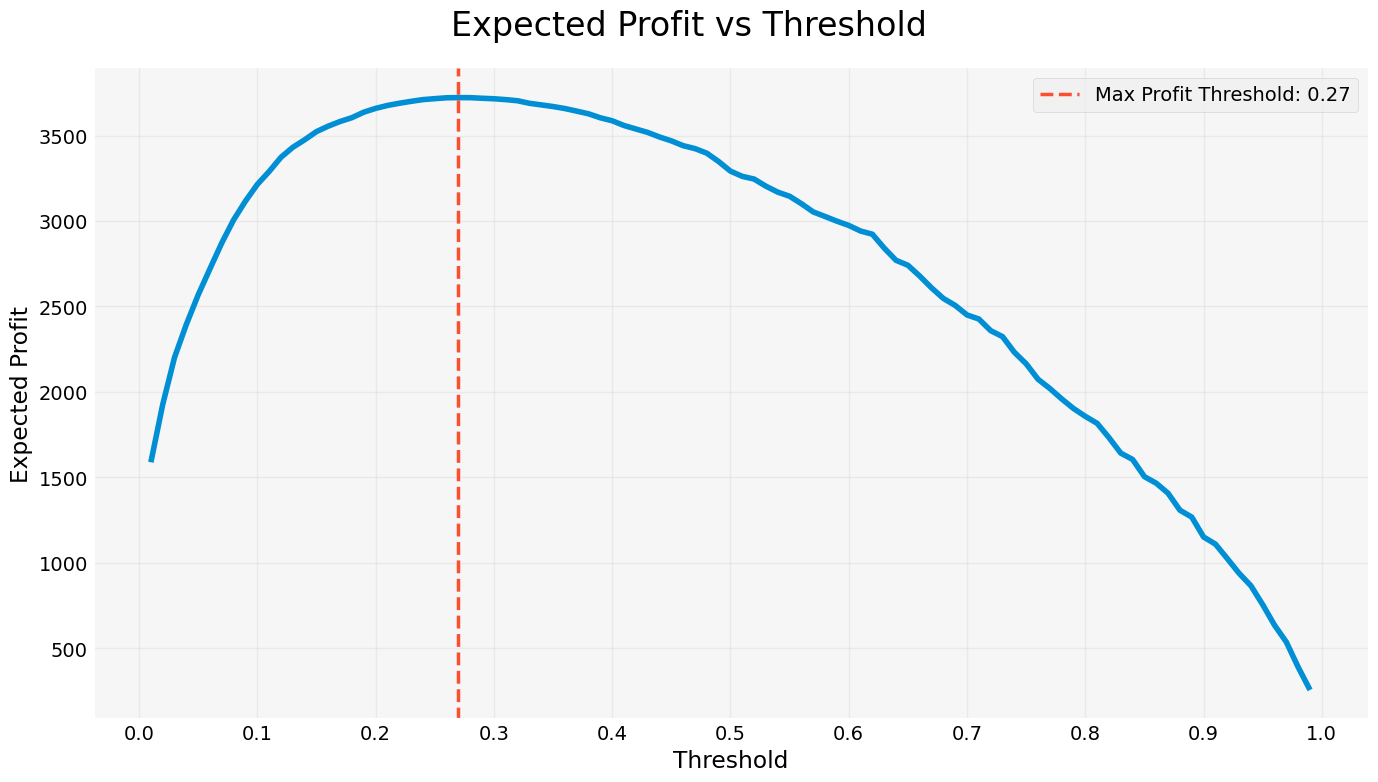

In [9]:
fig, ax = plt.subplots()

ax.plot(df_response_analysis["threshold"], df_response_analysis["expected_profit"])

# add a vertical line at the threshold with the highest profit
ax.axvline(
    df_response_analysis.loc[higher_profit, "threshold"],
    color="C1",
    linestyle="--",
    label=f"Max Profit Threshold: {df_response_analysis.loc[higher_profit, 'threshold']}",
    linewidth=2.5,
)

ax.set_xlabel("Threshold")
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel("Expected Profit")
ax.legend()
fig.suptitle("Expected Profit vs Threshold")

plt.show()

We can also add the revenue and cost curves to the plot to better understand the behavior of the profit:

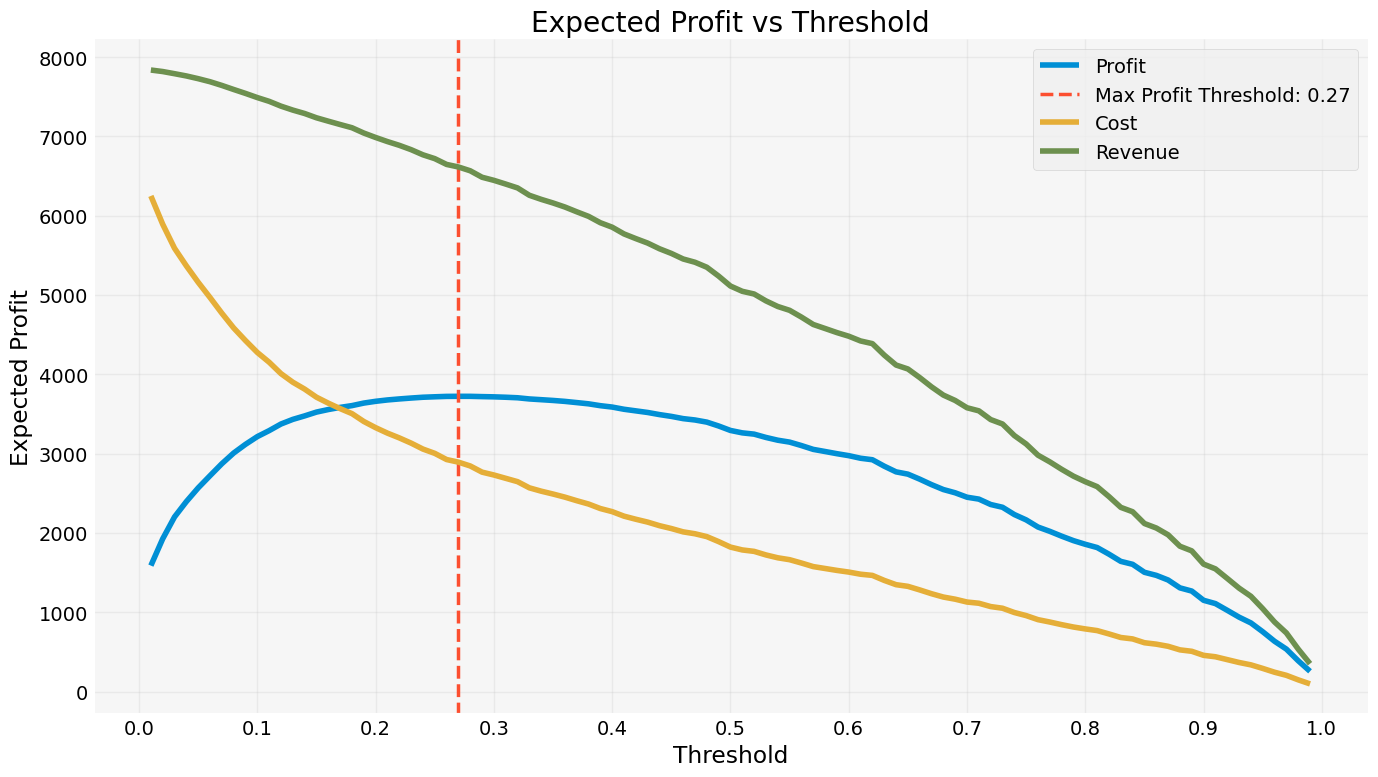

In [10]:
fig, ax = plt.subplots()

ax.plot(df_response_analysis["threshold"], df_response_analysis["expected_profit"], label="Profit")

# add a vertical line at the threshold with the highest profit
ax.axvline(
    df_response_analysis.loc[higher_profit, "threshold"],
    color="C1",
    linestyle="--",
    label=f"Max Profit Threshold: {df_response_analysis.loc[higher_profit, 'threshold']}",
    linewidth=2.5,
)

# add cost curve
cost_curve = df_response_analysis["expected_cost"]
ax.plot(df_response_analysis["threshold"], cost_curve, color="C2", label="Cost")

# add revenue curve
revenue_curve = df_response_analysis["expected_revenue"]
ax.plot(df_response_analysis["threshold"], revenue_curve, color="C3", label="Revenue")

ax.set_xlabel("Threshold")
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel("Expected Profit")
ax.set_title("Expected Profit vs Threshold")

ax.legend()

plt.show()

We can have a look at the selected customers (those with a probability of buying greater or equal than the threshold) and see the segment of customers that we are targeting:

In [11]:
selected_customers_higher_profit = df_proba[
    df_proba["Response_Proba"] >= df_response_analysis.loc[higher_profit, "threshold"]
]

selected_customers_higher_profit.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,Response,MonthsSinceEnrolled,AgeGroup,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,Segment,Response_Proba
0,Graduation,Single,58138.0,635,88,546,172,88,88,8,...,1,22,46-60,1529,0,0,0,0,Elite,0.973014
6,Graduation,Single,55635.0,235,65,164,50,49,27,7,...,0,19,31-45,563,1,1,0,0,Valuable,0.695155
7,PhD,Partner,33454.0,76,10,56,3,1,23,4,...,0,13,18-30,146,1,1,0,0,Engaged,0.467569
8,PhD,Partner,30351.0,14,0,24,3,3,2,3,...,1,12,31-45,44,1,1,0,0,Occasional,0.515841
9,PhD,Partner,5648.0,28,0,6,1,1,13,1,...,0,3,61+,36,2,1,1,1,Dormant,0.528079


In [12]:
# column Response as int
selected_customers_higher_profit["Response"] = (
    selected_customers_higher_profit["Response"].astype(int)
)

/tmp/ipykernel_1313360/1546859598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_customers_higher_profit["Response"] = (


In [13]:
conversion_by_segment = (
    selected_customers_higher_profit.groupby("Segment", observed=False)["Response"]
    .agg(["count", "mean"])
    .round(3)
)

conversion_by_segment["propotion_of_customers"] = (
    (conversion_by_segment["count"] / df_proba.shape[0])
    .mul(100)
    .round(1)
)

conversion_by_segment["cummulative_propotion_of_customers"] = (
    conversion_by_segment["propotion_of_customers"].cumsum()
)

conversion_by_segment["proportion_each_segment"] = (
    conversion_by_segment["count"] / conversion_by_segment["count"].sum()
).mul(100).round(1)

conversion_by_segment["cummulative_proportion_each_segment"] = (
    conversion_by_segment["proportion_each_segment"].cumsum()
)

conversion_by_segment["converted_customers"] = (
    conversion_by_segment["count"] * conversion_by_segment["mean"]
).astype(int)

conversion_by_segment["proportion_converted_customers"] = (
    conversion_by_segment["converted_customers"] / selected_customers_higher_profit.shape[0]
).mul(100).round(1)

conversion_by_segment["cumulative_proportion_converted_customers"] = (
    conversion_by_segment["proportion_converted_customers"].cumsum()
)


conversion_by_segment.columns = [
    "Selected Customers",
    "Conversion Rate",
    "Proportion of Selected Customers to Total (%)",
    "Cummulative Proportion of Selected Customers to Total (%)",
    "Proportion of each Segment (%)",
    "Cummulative Proportion of each Segment (%)",
    "Converted Customers",
    "Proportion of Converted Customers (%)",
    "Cummulative Proportion of Converted Customers (%)",
]

# reorder columns
conversion_by_segment = conversion_by_segment[
    [
        "Conversion Rate",
        "Selected Customers",
        "Proportion of Selected Customers to Total (%)",
        "Cummulative Proportion of Selected Customers to Total (%)",
        "Proportion of each Segment (%)",
        "Cummulative Proportion of each Segment (%)",
        "Converted Customers",
        "Proportion of Converted Customers (%)",
        "Cummulative Proportion of Converted Customers (%)",
    ]
]

conversion_by_segment

,Conversion Rate,Selected Customers,Proportion of Selected Customers to Total (%),Cummulative Proportion of Selected Customers to Total (%),Proportion of each Segment (%),Cummulative Proportion of each Segment (%),Converted Customers,Proportion of Converted Customers (%),Cummulative Proportion of Converted Customers (%)
Segment,,,,,,,,,
Dormant,0.231,26,1.2,1.2,2.7,2.7,6,0.6,0.6
Occasional,0.218,119,5.4,6.6,12.3,15.0,25,2.6,3.2
Engaged,0.275,309,14.0,20.6,32.1,47.1,84,8.7,11.9
Valuable,0.336,271,12.3,32.9,28.1,75.2,91,9.4,21.3
Elite,0.452,239,10.8,43.7,24.8,100.0,108,11.2,32.5


We see that this threshold takes 43.7% of the original customers of our dataset. This is good, as we are not targeting too few customers (which would decrease our revenue) or too many customers (which would increase our cost).

From the selected customers, we converted 32.5% of them into buyers. This is a good conversion rate, as it is higher than the conversion rate of pilot campaigns (15 %). So the segmentation and the model are working well. Also, the conversion rate per segment is higher than the conversion rate of the pilot campaign.

Most of the selected customers are in segments "Valuable" and "Elite". These are the segments that we are most interested in targeting, as they are the most likely to buy the gadget (higher conversion rate).

We can plot some of the data of conversion rate per segment to better understand the behavior of the conversion rate. Let's start with the absolute values of converted customers per segment:

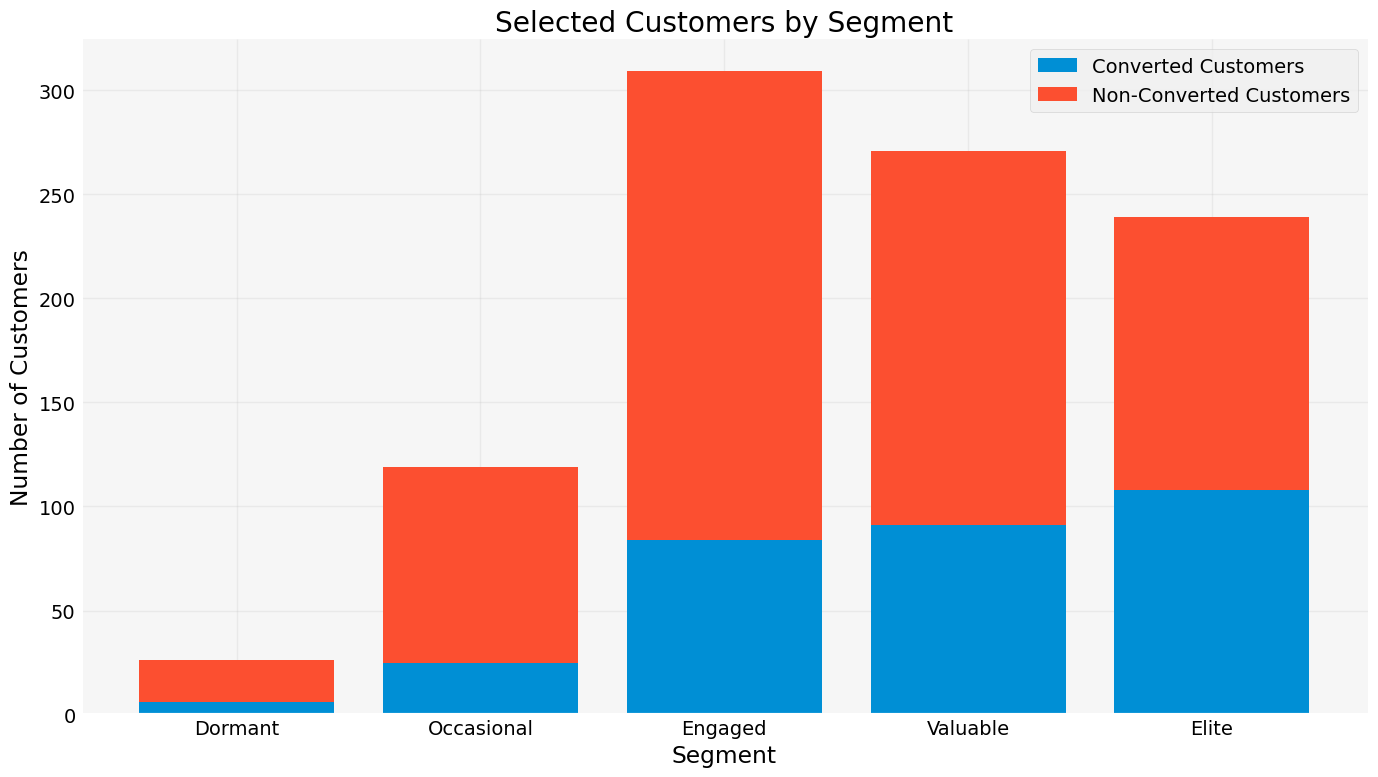

In [14]:
conversion_by_segment["Non-Converted Customers"] = (
    conversion_by_segment["Selected Customers"] - conversion_by_segment["Converted Customers"]
)

fig, ax = plt.subplots()

ax.bar(
    conversion_by_segment.index,
    conversion_by_segment["Converted Customers"],
    label="Converted Customers",
    color="C0",
)

ax.bar(
    conversion_by_segment.index,
    conversion_by_segment["Non-Converted Customers"],
    bottom=conversion_by_segment["Converted Customers"],
    label="Non-Converted Customers",
    color="C1",
)

ax.set_xlabel("Segment")
ax.set_ylabel("Number of Customers")
ax.set_title("Selected Customers by Segment")
ax.legend()

plt.show()

It's evident that our model prioritizes the segments with higher conversion rates.

The same plot can be done with percentages:

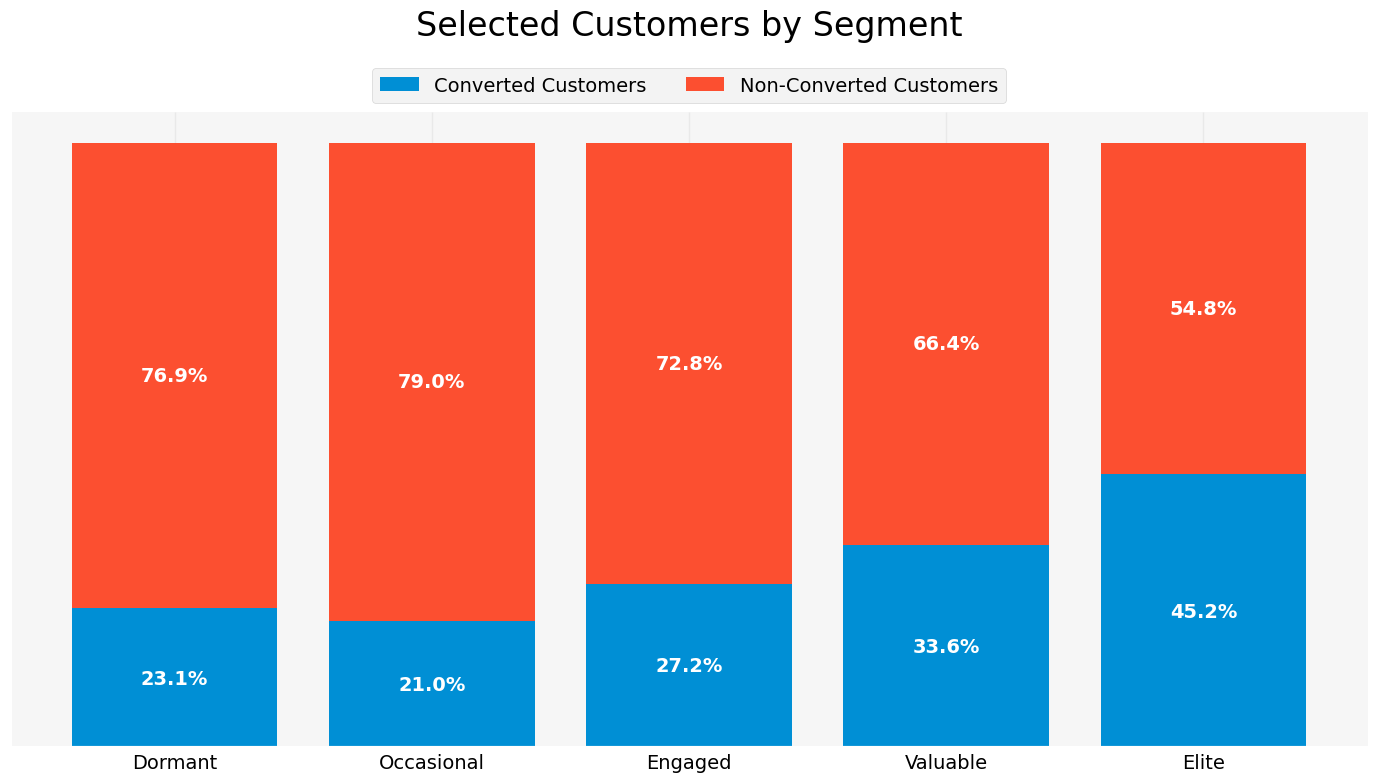

In [15]:
# same plot, but with percentage
total_customers = (
    conversion_by_segment["Converted Customers"]
    + conversion_by_segment["Non-Converted Customers"]
)

# Convert counts to percentages
converted_pct = conversion_by_segment["Converted Customers"] / total_customers
non_converted_pct = conversion_by_segment["Non-Converted Customers"] / total_customers

fig, ax = plt.subplots()

ax.bar(
    conversion_by_segment.index,
    converted_pct,
    label="Converted Customers",
    color="C0",
)

ax.bar(
    conversion_by_segment.index,
    non_converted_pct,
    bottom=converted_pct,
    label="Non-Converted Customers",
    color="C1",
)

for bar in ax.containers:
    ax.bar_label(
        bar,
        fmt="%.1f%%",
        label_type="center",
        labels=[f"{v:.1%}" for v in bar.datavalues],
        color="white",
        weight="bold",
    )

ax.set_yticks([])
ax.set_ylabel("")
ax.set_xlabel("")

ax.legend(bbox_to_anchor=(0.5, 1), loc="lower center", ncol=2)

fig.suptitle("Selected Customers by Segment")

plt.show()

Another interesting result is that every segment has a higher conversion rate than the pilot campaign. The pilot campaign had a conversion rate of 15%, and all segments have a conversion rate higher than 15%.

We can think of this as the following: without the model, if we targeted all customers, randomly, we would have a conversion rate of 15%. With the model, we can target only 43.7% of the customers and have a conversion rate of 32.5%. This is a significant improvement. More, each segment has a conversion rate higher than 15%. So, even segments with lower conversion rates are better than the pilot campaign.

A formal way of saying the above statement is that the model lifts the conversion rate of the campaign. The lift is the ratio between the conversion rate of the campaign with the model and the conversion rate of the campaign without the model. We can calculate the lift for each segment based on the conversion rate of the pilot campaign and the overall lift:

In [16]:
df_proba["Response"] = df_proba["Response"].astype(int)
baseline_conversion_rate = df_proba["Response"].mean()

baseline_conversion_rate

np.float64(0.1510204081632653)

In [17]:
overall_lift = (
    conversion_by_segment["Cummulative Proportion of Converted Customers (%)"].iloc[-1]
    / 100
    / baseline_conversion_rate
)

overall_lift

np.float64(2.152027027027027)

In [18]:
conversion_by_segment["lift_conversion_rate"] = (
    conversion_by_segment["Conversion Rate"] / baseline_conversion_rate
).round(2)

conversion_by_segment

,Conversion Rate,Selected Customers,Proportion of Selected Customers to Total (%),Cummulative Proportion of Selected Customers to Total (%),Proportion of each Segment (%),Cummulative Proportion of each Segment (%),Converted Customers,Proportion of Converted Customers (%),Cummulative Proportion of Converted Customers (%),Non-Converted Customers,lift_conversion_rate
Segment,,,,,,,,,,,
Dormant,0.231,26,1.2,1.2,2.7,2.7,6,0.6,0.6,20,1.53
Occasional,0.218,119,5.4,6.6,12.3,15.0,25,2.6,3.2,94,1.44
Engaged,0.275,309,14.0,20.6,32.1,47.1,84,8.7,11.9,225,1.82
Valuable,0.336,271,12.3,32.9,28.1,75.2,91,9.4,21.3,180,2.22
Elite,0.452,239,10.8,43.7,24.8,100.0,108,11.2,32.5,131,2.99


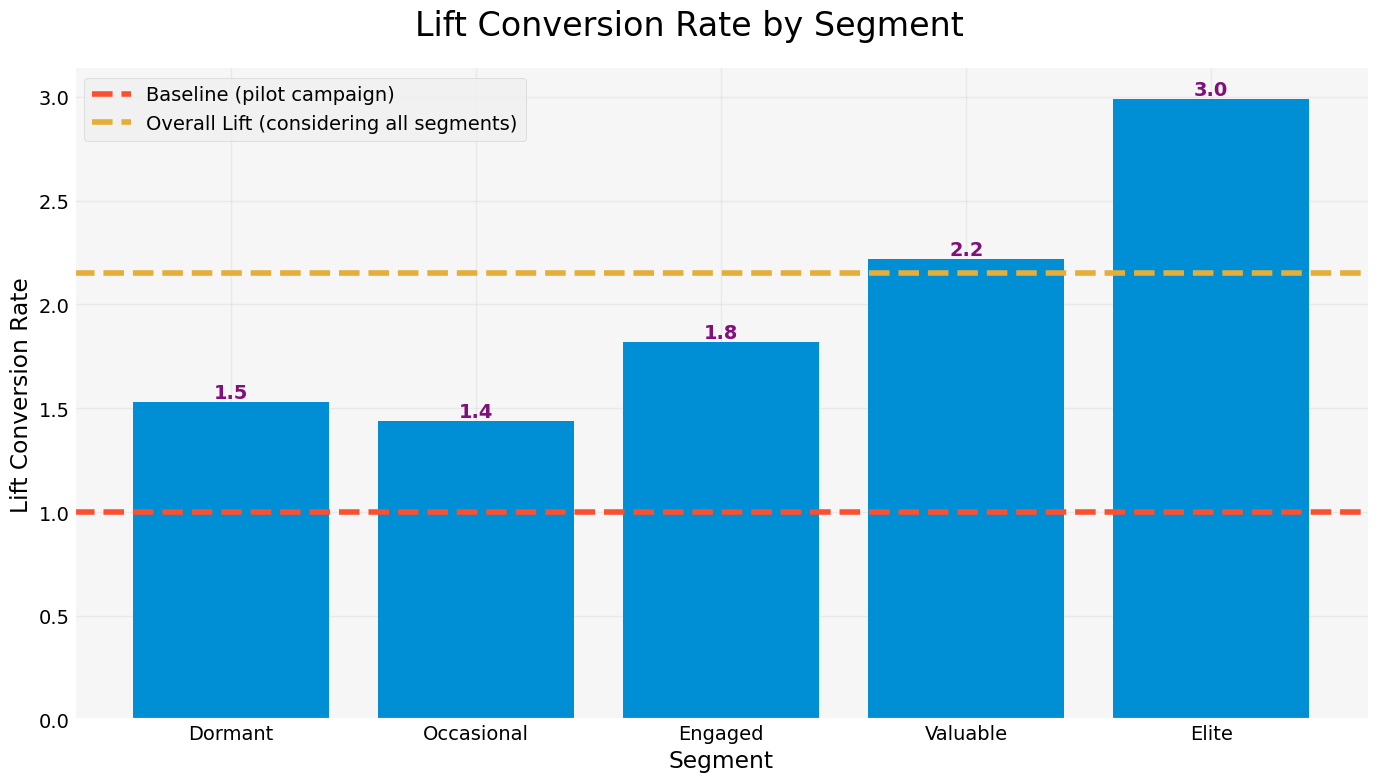

In [19]:
fig, ax = plt.subplots()

ax.bar(
    conversion_by_segment.index,
    conversion_by_segment["lift_conversion_rate"],
    color="C0",
)

for bar in ax.containers:
    ax.bar_label(
        bar,
        label_type="edge",
        labels=[f"{v:.1f}" for v in bar.datavalues],
        color="C5",
        weight="bold",
    )

ax.axhline(1, color="C1", linestyle="--", label="Baseline (pilot campaign)")

ax.axhline(
    overall_lift,
    color="C2",
    linestyle="--",
    label="Overall Lift (considering all segments)",
)

ax.set_xlabel("Segment")
ax.set_ylabel("Lift Conversion Rate")
ax.legend()

fig.suptitle("Lift Conversion Rate by Segment")

plt.show()

We see that all segments have a lift higher than 1, which means that the model is improving the conversion rate of the campaign. The overall lift is 2.15, which means that the model is improving the conversion rate of the campaign by 115%. The lift is even higher for the segments "Valuable" and "Elite", which are the segments that we are most interested in targeting.

In the next section, this concept of lift will be explored further.

## Other possible approaches

In the current approach, we are trying to maximize the profit of the campaign. We are doing this by selecting the customers with the highest probability of buying the gadget and making calculations to find the threshold that maximizes the profit based on the revenue and cost of the campaign.

However, sometimes we do not have control (or precise information) about the revenue and cost of the campaign. In contexts like these, we can try to maximize the conversion rate (the number of customers who buy the gadget divided by the number of customers that we target).

In these cases, we can attempt to select a model using gains and lift curves.

### Gains Chart: Measuring the Improvement Over Random Targeting

The **Gains Chart** is a visualization that helps assess how well the model ranks customers based on their likelihood to respond to the campaign. It compares the cumulative percentage of actual responders captured when selecting the top-ranked customers versus a random selection.

- The customers are sorted in descending order based on their predicted probability of response.
- They are divided into deciles (10 equal groups), where the first decile contains the top 10% most likely responders, the second decile the next 10%, and so on.
- The cumulative percentage of actual buyers is plotted against the cumulative percentage of contacted customers.
- The **baseline**, representing random selection, follows a diagonal line where X% of customers contacted yield X% of responders.
- A well-performing model should show a steep curve early on, capturing a high percentage of buyers with a small fraction of customers contacted.

For this marketing campaign, an ideal Gains Chart would show that by targeting, for example, the top 20% of customers (as ranked by the model), the company captures significantly more than 20% of total potential buyers. This allows the marketing team to focus efforts on a smaller, high-potential subset of customers, thus maximizing return on investment.


### Lift Chart: Quantifying the Model’s Improvement Over Random Selection

The **Lift Chart** extends the Gains Chart by showing how much better the model performs compared to a random selection.

- **Lift** is calculated as the ratio of the cumulative response rate within each decile to the overall average response rate of the dataset.
- The chart plots lift on the Y-axis against the percentage of customers contacted on the X-axis.
- The baseline (lift = 1) represents random targeting, meaning the model provides no added value beyond chance.
- A good model will produce a curve where the initial deciles have lift values significantly greater than 1, indicating that the model effectively prioritizes high-value customers.

In the pilot campaign, only **15%** of customers purchased the gadget. Without a model, selecting any 100 customers would, on average, yield only 15 buyers. However, if the model effectively ranks customers by likelihood to respond, the lift chart should show that targeting the top decile (10% of customers) yields significantly more than 15%, demonstrating the model’s added value.


### Creating the Gains and Lift Charts

Let's create the Gains and Lift Charts for our model to see how well it ranks customers based on their likelihood to buy the gadget. First, we need to sort the customers based on their predicted probabilities and divide them into deciles. Then, we can calculate the cumulative percentage of buyers and the lift for each decile:

In [20]:
# Define the target and probability columns
target_col = "Response"
prob_col = "Response_Proba"


# Sort data by predicted probability in descending order
df_proba_sorted = df_proba.sort_values(by=prob_col, ascending=False).reset_index(
    drop=True
)

# Create deciles (10 bins)
df_proba_sorted["Decile"] = pd.qcut(
    df_proba_sorted[prob_col], q=10, labels=np.arange(10, 0, -1)
)

# Calculate cumulative response rate for gains chart
gains_df = (
    df_proba_sorted.groupby("Decile", observed=False)
    .agg(Total_Responses=(target_col, "sum"), Total_Customers=(target_col, "count"))
    .sort_index(ascending=False)
)

gains_df["Cumulative_Responses"] = gains_df["Total_Responses"].cumsum()
gains_df["Cumulative_Percentage_Responses"] = (
    gains_df["Cumulative_Responses"] / gains_df["Total_Responses"].sum()
)
gains_df["Cumulative_Customers"] = gains_df["Total_Customers"].cumsum()
gains_df["Cumulative_Response_Rate"] = (
    gains_df["Cumulative_Responses"] / gains_df["Cumulative_Customers"]
)
gains_df["Percentage_Customers"] = (
    gains_df["Cumulative_Customers"] / gains_df["Total_Customers"].sum()
)

baseline_response_rate = df_proba[target_col].mean()  # overall response rate 15 %
gains_df["Lift"] = gains_df["Cumulative_Response_Rate"] / baseline_response_rate

gains_df

,Total_Responses,Total_Customers,Cumulative_Responses,Cumulative_Percentage_Responses,Cumulative_Customers,Cumulative_Response_Rate,Percentage_Customers,Lift
Decile,,,,,,,,
1,159,221,159,0.477477,221,0.719457,0.100227,4.763972
2,78,220,237,0.711712,441,0.537415,0.200000,3.558559
3,49,221,286,0.858859,662,0.432024,0.300227,2.860701
4,23,220,309,0.927928,882,0.350340,0.400000,2.319820
5,12,220,321,0.963964,1102,0.291289,0.499773,1.928803
6,4,221,325,0.975976,1323,0.245654,0.600000,1.626627
7,5,220,330,0.990991,1543,0.213869,0.699773,1.416160
8,3,221,333,1.000000,1764,0.188776,0.800000,1.250000
9,0,220,333,1.000000,1984,0.167843,0.899773,1.111391


First, the Gains Chart:

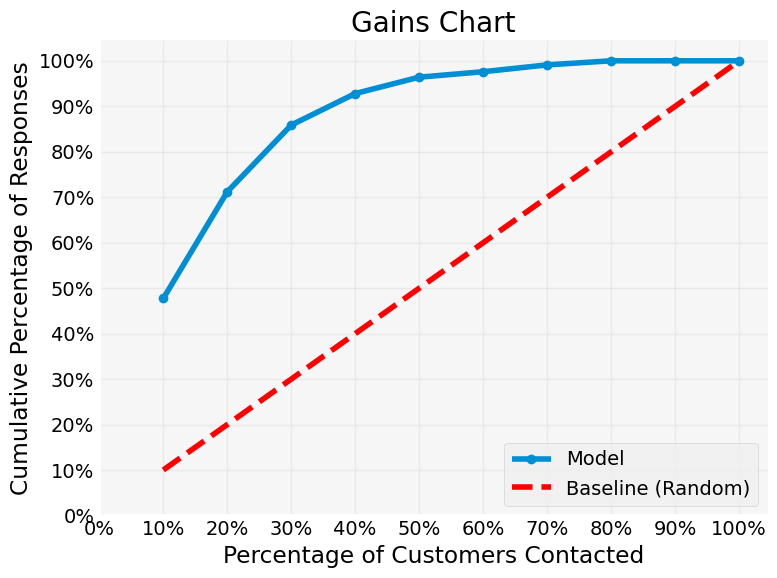

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(
    gains_df["Percentage_Customers"],
    gains_df["Cumulative_Percentage_Responses"],
    marker="o",
    linestyle="-",
    label="Model",
)
ax.plot(
    gains_df["Percentage_Customers"],
    gains_df["Percentage_Customers"],
    linestyle="--",
    color="red",
    label="Baseline (Random)",
)

# Labels and Title
ax.set_xlabel("Percentage of Customers Contacted")
ax.set_ylabel("Cumulative Percentage of Responses")
ax.set_title("Gains Chart")

# format axes as percentages
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Grid, Legend, and Show
ax.legend()
ax.grid(True)
plt.show()

We see that, taking the top 10% of customers, we capture around 48% of the buyers. This is a good result, as we are capturing more buyers than the percentage of customers that we are targeting. This means that our model is working well, as it is ranking the customers based on their likelihood to buy the gadget.

Now, the Lift Chart:

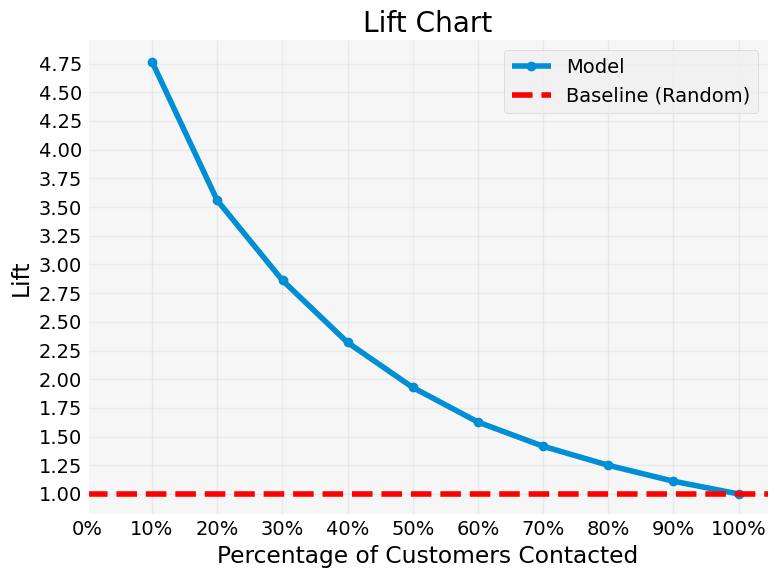

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(
    gains_df["Percentage_Customers"],
    gains_df["Lift"],
    marker="o",
    linestyle="-",
    label="Model",
)
ax.axhline(y=1, color="red", linestyle="--", label="Baseline (Random)")

# Labels and Title
ax.set_xlabel("Percentage of Customers Contacted")
ax.set_ylabel("Lift")
ax.set_title("Lift Chart")

# format axes as percentages
# y axis 0.2 increments
ax.set_yticks(np.arange(1, 4.8, 0.25))
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Grid, Legend, and Show
ax.legend()
ax.grid(True)
plt.show()

We see that, taking the top 10% of customers, we capture around 4.8 times more buyers than if we were selecting customers randomly. This is a good result, as it shows that our model is adding value to the campaign, by ranking the customers based on their likelihood to buy the gadget.

Both charts show that our model is working well, as it is ranking the customers based on their likelihood to buy the gadget. This will help the marketing team to focus their efforts on the customers who are most likely to buy the gadget, maximizing the return on investment of the campaign.

Since we have the revenue and cost of the campaign, the profit analysis done previously is more straightforward. However, if we do not have this information, the Gains and Lift Charts can be a good alternative to evaluate the model and maximize the conversion rate of the campaign.